In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 
# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.taylan_rve import TaylanRVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.design_of_experiment.path_sampler import StrainPathSampler
from rvesimulator.microstructures.microstructure_plots import PlotRVE2D

In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"num_control": 7, "num_increment": 100})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
data = doe_sampler.data
print(data)

{'samples':    num_control  num_increment
0          7.0          100.0, 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


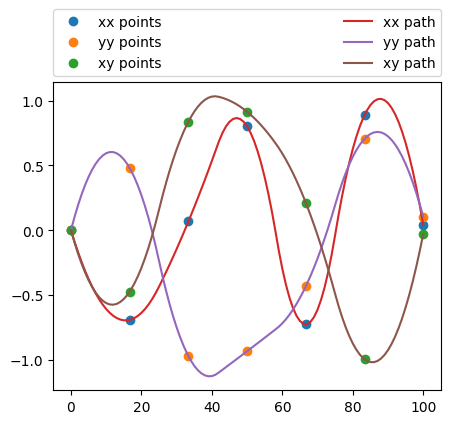

In [3]:
# initialize the strain path generator
strain_path_generator = StrainPathSampler(seed=12, num_dim=3)
data_2d = strain_path_generator.get_strain_path(
    data=data.copy(), arg_name="loads_path", interploation_method="quadratic"
)
strain_path_generator.plot_path(iteration=0)

## Task 1 



The simulation information is : {'length': 1.0, 'width': 1.0, 'radius': 0.1, 'location_information': [[0.5, 0.25, 0.1, 1], [0.5, 0.75, 0.1, 1]], 'youngs_modulus': 200000.0, 'poission_ratio': 0.3, 'yield_table': [[250.0, 270.0, 290.0, 310.0, 330.0, 350.0, 370.0, 390.0, 410.0, 430.0, 450.0, 470.0, 490.0, 510.0, 530.0, 550.0, 570.0, 590.0, 610.0, 630.0, 650.0, 670.0, 690.0, 710.0, 730.0, 750.0, 770.0, 790.0, 810.0, 830.0, 850.0, 870.0, 890.0, 910.0, 930.0, 950.0000000000001, 970.0, 990.0, 1010.0, 1030.0, 1050.0, 1070.0, 1090.0, 1110.0, 1130.0, 1150.0, 1170.0, 1190.0, 1210.0, 1230.0, 1250.0, 1270.0, 1290.0, 1310.0, 1330.0, 1350.0, 1370.0, 1390.0000000000002, 1410.0, 1430.0, 1450.0, 1470.0, 1490.0, 1510.0, 1530.0, 1550.0, 1570.0, 1590.0, 1610.0, 1630.0000000000002, 1650.0000000000002, 1670.0, 1690.0, 1710.0, 1730.0, 1750.0, 1770.0, 1790.0, 1810.0, 1830.0, 1850.0, 1870.0, 1890.0000000000002, 1910.0000000000002, 1930.0, 1950.0, 1970.0, 1990.0, 2010.0, 2030.0, 2050.0, 2070.0, 2090.0, 2110.0, 2

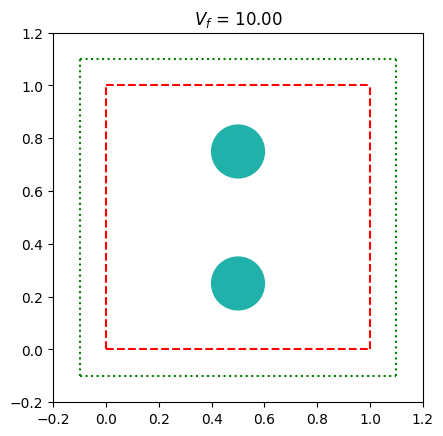

In [4]:
simulation_wrapper = TaylanRVE()
simulation_wrapper.update_sim_info(loads=[0.01, 0.01, 0.01], mesh_partition=100, task="task1", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.heter_cricle_inclusion_plot(circle_position=location_info,
                                        radius_mu=0.1,
                                        len_start=-0.1,
                                        len_end=1.1,
                                        wid_start=-0.1,
                                        wid_end=1.1,
                                        vol_frac=0.1)

In [5]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_1.pickle')

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/taylancase/different_geometry/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<22 out of 30 licenses remain available>.


simulation time :40.008432 s
simulation time :60.016496 s
simulation time :80.016530 s
simulation time :100.017171 s
simulation time :120.016677 s
simulation time :140.016762 s
simulation time :160.017029 s
simulation time :180.020683 s
simulation time :200.016897 s
simulation time :220.016889 s
simulation time :240.020517 s
simulation time :260.020529 s
simulation time :280.021015 s
simulation time :300.017059 s
simulation time :320.020616 s
simulation time :340.020607 s
simulation time :360.017184 s
simulation time :380.019266 s
simulation time :400.021000 s
simulation time :420.013503 s
simulation time :440.017410 s
simulation time :460.021310 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 480.0679666996002
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<22 out of 30 licenses remain available>.


# task 2

The simulation information is : {'length': 1.0, 'width': 1.0, 'radius': 0.1, 'location_information': [[0.25, 0.25, 0.1, 1], [0.25, 0.75, 0.1, 1], [0.75, 0.25, 0.1, 1], [0.75, 0.75, 0.1, 1]], 'youngs_modulus': 200000.0, 'poission_ratio': 0.3, 'yield_table': [[250.0, 270.0, 290.0, 310.0, 330.0, 350.0, 370.0, 390.0, 410.0, 430.0, 450.0, 470.0, 490.0, 510.0, 530.0, 550.0, 570.0, 590.0, 610.0, 630.0, 650.0, 670.0, 690.0, 710.0, 730.0, 750.0, 770.0, 790.0, 810.0, 830.0, 850.0, 870.0, 890.0, 910.0, 930.0, 950.0000000000001, 970.0, 990.0, 1010.0, 1030.0, 1050.0, 1070.0, 1090.0, 1110.0, 1130.0, 1150.0, 1170.0, 1190.0, 1210.0, 1230.0, 1250.0, 1270.0, 1290.0, 1310.0, 1330.0, 1350.0, 1370.0, 1390.0000000000002, 1410.0, 1430.0, 1450.0, 1470.0, 1490.0, 1510.0, 1530.0, 1550.0, 1570.0, 1590.0, 1610.0, 1630.0000000000002, 1650.0000000000002, 1670.0, 1690.0, 1710.0, 1730.0, 1750.0, 1770.0, 1790.0, 1810.0, 1830.0, 1850.0, 1870.0, 1890.0000000000002, 1910.0000000000002, 1930.0, 1950.0, 1970.0, 1990.0, 201

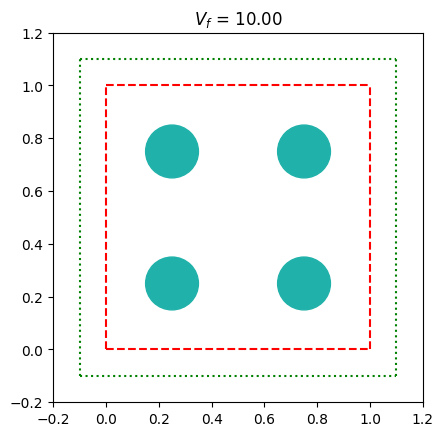

In [6]:
simulation_wrapper.update_sim_info(loads=[0.01, 0.01, 0.01], mesh_partition=100, task="task2", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.heter_cricle_inclusion_plot(circle_position=location_info,
                                        radius_mu=0.1,
                                        len_start=-0.1,
                                        len_end=1.1,
                                        wid_start=-0.1,
                                        wid_end=1.1,
                                        vol_frac=0.1)

In [7]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_2.pickle')

remove results succesfully 

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/taylancase/different_geometry/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<22 out of 30 licenses remain available>.


Abaqus Error: cae exited with an error.
simulation time :40.006350 s
simulation time :60.005151 s
simulation time :80.018625 s
simulation time :100.019385 s
simulation time :120.018655 s
simulation time :140.018714 s
simulation time :160.018753 s
simulation time :180.018792 s
simulation time :200.018854 s
simulation time :220.018967 s
simulation time :240.019221 s
simulation time :260.018990 s
simulation time :280.013386 s
simulation time :300.013615 s
simulation time :320.019959 s
simulation time :340.019254 s
simulation time :360.019131 s
simulation time :380.019306 s
simulation time :400.018890 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 420.09034538269043
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<23 out of 30 licenses remain available>.


# task 3

The simulation information is : {'length': 1.0, 'width': 1.0, 'radius': 0.1, 'location_information': [[0.5, 0.25, 0.2, 1], [0.5, 0.75, 0.2, 1]], 'youngs_modulus': 200000.0, 'poission_ratio': 0.3, 'yield_table': [[250.0, 270.0, 290.0, 310.0, 330.0, 350.0, 370.0, 390.0, 410.0, 430.0, 450.0, 470.0, 490.0, 510.0, 530.0, 550.0, 570.0, 590.0, 610.0, 630.0, 650.0, 670.0, 690.0, 710.0, 730.0, 750.0, 770.0, 790.0, 810.0, 830.0, 850.0, 870.0, 890.0, 910.0, 930.0, 950.0000000000001, 970.0, 990.0, 1010.0, 1030.0, 1050.0, 1070.0, 1090.0, 1110.0, 1130.0, 1150.0, 1170.0, 1190.0, 1210.0, 1230.0, 1250.0, 1270.0, 1290.0, 1310.0, 1330.0, 1350.0, 1370.0, 1390.0000000000002, 1410.0, 1430.0, 1450.0, 1470.0, 1490.0, 1510.0, 1530.0, 1550.0, 1570.0, 1590.0, 1610.0, 1630.0000000000002, 1650.0000000000002, 1670.0, 1690.0, 1710.0, 1730.0, 1750.0, 1770.0, 1790.0, 1810.0, 1830.0, 1850.0, 1870.0, 1890.0000000000002, 1910.0000000000002, 1930.0, 1950.0, 1970.0, 1990.0, 2010.0, 2030.0, 2050.0, 2070.0, 2090.0, 2110.0, 2

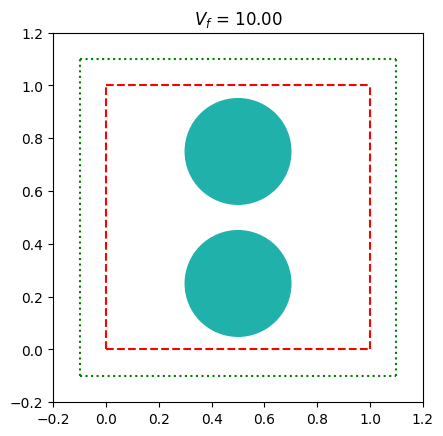

In [8]:
simulation_wrapper.update_sim_info(loads=[0.01, 0.01, 0.01], mesh_partition=100, task="task3", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.heter_cricle_inclusion_plot(circle_position=location_info,
                                        radius_mu=0.1,
                                        len_start=-0.1,
                                        len_end=1.1,
                                        wid_start=-0.1,
                                        wid_end=1.1,
                                        vol_frac=0.1)

In [9]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_3.pickle')

remove results succesfully 

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/taylancase/different_geometry/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<23 out of 30 licenses remain available>.


simulation time :40.010355 s
simulation time :60.020422 s
simulation time :80.016061 s
simulation time :100.019384 s
simulation time :120.019445 s
simulation time :140.019189 s
simulation time :160.020776 s
simulation time :180.020515 s
simulation time :200.007323 s
simulation time :220.018420 s
simulation time :240.019715 s
simulation time :260.018747 s
simulation time :280.019883 s
simulation time :300.019897 s
simulation time :320.019966 s
simulation time :340.020083 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 360.0804946422577
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<22 out of 30 licenses remain available>.


# task 4

The simulation information is : {'length': 1.0, 'width': 1.0, 'radius': 0.1, 'location_information': [[0.25, 0.25, 0.2, 1], [0.25, 0.75, 0.2, 1], [0.75, 0.25, 0.2, 1], [0.75, 0.75, 0.2, 1], [0.5, 0.5, 0.1, 1]], 'youngs_modulus': 200000.0, 'poission_ratio': 0.3, 'yield_table': [[250.0, 270.0, 290.0, 310.0, 330.0, 350.0, 370.0, 390.0, 410.0, 430.0, 450.0, 470.0, 490.0, 510.0, 530.0, 550.0, 570.0, 590.0, 610.0, 630.0, 650.0, 670.0, 690.0, 710.0, 730.0, 750.0, 770.0, 790.0, 810.0, 830.0, 850.0, 870.0, 890.0, 910.0, 930.0, 950.0000000000001, 970.0, 990.0, 1010.0, 1030.0, 1050.0, 1070.0, 1090.0, 1110.0, 1130.0, 1150.0, 1170.0, 1190.0, 1210.0, 1230.0, 1250.0, 1270.0, 1290.0, 1310.0, 1330.0, 1350.0, 1370.0, 1390.0000000000002, 1410.0, 1430.0, 1450.0, 1470.0, 1490.0, 1510.0, 1530.0, 1550.0, 1570.0, 1590.0, 1610.0, 1630.0000000000002, 1650.0000000000002, 1670.0, 1690.0, 1710.0, 1730.0, 1750.0, 1770.0, 1790.0, 1810.0, 1830.0, 1850.0, 1870.0, 1890.0000000000002, 1910.0000000000002, 1930.0, 1950.0,

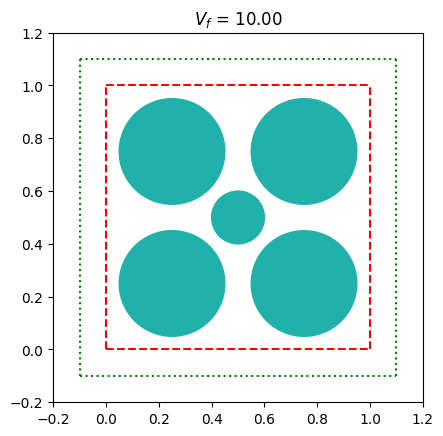

In [10]:
simulation_wrapper.update_sim_info(loads=[0.01, 0.01, 0.01], mesh_partition=100, task="task4", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.heter_cricle_inclusion_plot(circle_position=location_info,
                                        radius_mu=0.1,
                                        len_start=-0.1,
                                        len_end=1.1,
                                        wid_start=-0.1,
                                        wid_end=1.1,
                                        vol_frac=0.1)


In [11]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_4.pickle')

remove results succesfully 

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/taylancase/different_geometry/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<22 out of 30 licenses remain available>.


simulation time :40.009042 s
simulation time :60.017324 s
simulation time :80.020414 s
simulation time :100.020458 s
simulation time :120.017668 s
simulation time :140.020967 s
simulation time :160.020457 s
simulation time :180.019026 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 200.07078671455383
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<23 out of 30 licenses remain available>.


# plot all results together 

In [12]:
os.getcwd()

'/home/jiaxiangyi/Documents/rvesimulator/examples/taylancase/different_geometry/Data'

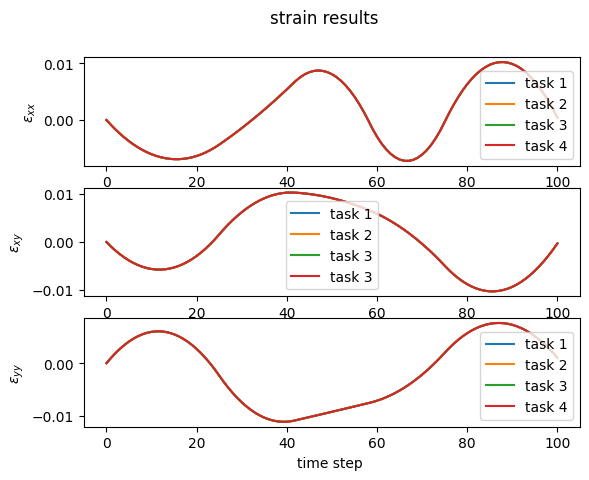

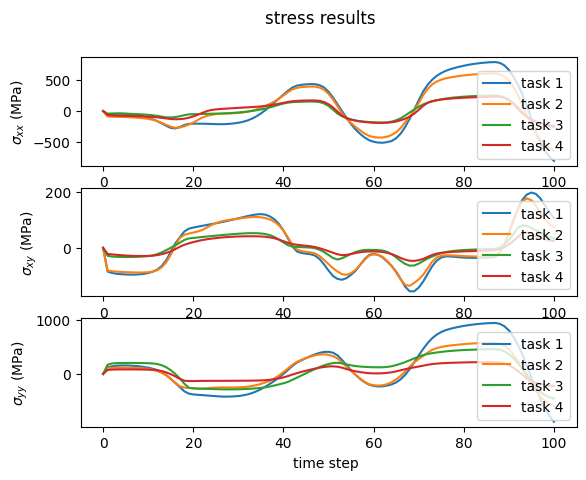

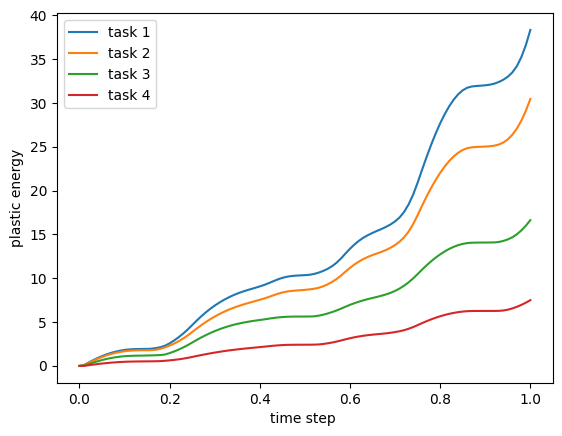

In [13]:
# os.chdir('Data/')
with open("task_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_4.pickle", "rb") as fd:
    benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")

results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
results_4 =benchmark_4["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(3,1)
ax[0].plot(strain_1[:, 0, 0], label="task 1") 
ax[0].plot(strain_2[:, 0, 0], label="task 2") 
ax[0].plot(strain_3[:, 0, 0], label="task 3") 
ax[0].plot(strain_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="task 1")
ax[1].plot(strain_2[:, 0, 1], label="task 2")
ax[1].plot(strain_3[:, 0, 1], label="task 3")
ax[1].plot(strain_4[:, 0, 1], label="task 3")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="task 1") 
ax[2].plot(strain_2[:, 1, 1], label="task 2") 
ax[2].plot(strain_3[:, 1, 1], label="task 3") 
ax[2].plot(strain_4[:, 1, 1], label="task 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(3,1)
ax[0].plot(stress_1[:, 0, 0], label="task 1") 
ax[0].plot(stress_2[:, 0, 0], label="task 2") 
ax[0].plot(stress_3[:, 0, 0], label="task 3") 
ax[0].plot(stress_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="task 1")
ax[1].plot(stress_2[:, 1, 0], label="task 2")
ax[1].plot(stress_3[:, 1, 0], label="task 3")
ax[1].plot(stress_4[:, 1, 0], label="task 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="task 1") 
ax[2].plot(stress_2[:, 1, 1], label="task 2") 
ax[2].plot(stress_3[:, 1, 1], label="task 3") 
ax[2].plot(stress_4[:, 1, 1], label="task 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="task 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="task 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="task 3") 
ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="task 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)